In [1]:
##import packages here
import pandas as pd
import numpy as np

# We'll use this later
from numpy import meshgrid

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

In C:\Users\Malavika\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Malavika\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Malavika\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Malavika\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Malavika\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_c

In [ ]:
##This file contains some parameter adjustments that can be made to prophet model, scenario 1. 

In [23]:
df1 = pd.read_csv('df1.csv')
df1 = df.rename(columns= {"Date":"ds",'Close': 'y'})
df1

,ds,y,tby,ffr,fta,eps,div,per,une,rus,wti,ppi,rfs,vix
0,2005-06-20,1216.10,4.11,3.04,812235.0,84.81,1.76,18.8026,5.0,641.840027,59.19,154.3,343998.0,148.30
1,2005-06-21,1213.61,4.06,3.04,812235.0,84.81,1.76,18.8026,5.0,641.039978,58.90,154.3,343998.0,149.00
2,2005-06-22,1213.88,3.95,3.04,811179.0,84.81,1.76,18.8026,5.0,643.450012,58.27,154.3,343998.0,148.40
3,2005-06-23,1200.73,3.96,3.04,811179.0,84.81,1.76,18.8026,5.0,634.119995,59.23,154.3,343998.0,150.50
4,2005-06-24,1191.57,3.92,3.04,811179.0,84.81,1.76,18.8026,5.0,630.409973,59.63,154.3,343998.0,152.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3874,2020-12-24,3703.06,0.94,0.09,7404039.0,97.20,1.61,38.2297,6.7,2003.949951,48.18,200.5,535972.0,23.85
3875,2020-12-28,3735.36,0.94,0.09,7404039.0,97.20,1.61,38.2297,6.7,1996.250000,47.50,200.5,535972.0,23.60
3876,2020-12-29,3727.04,0.94,0.09,7404039.0,97.20,1.61,38.2297,6.7,1959.359985,47.85,200.5,535972.0,24.70
3877,2020-12-30,3732.04,0.93,0.09,7363351.0,97.20,1.61,38.2297,6.7,1979.989990,48.24,200.5,535972.0,23.75


In [24]:
import datetime as datetime
ctf_date = datetime.datetime(2020, 3, 1)
df = df1.loc[df1.ds < ctf_date , ].copy()
df

,ds,y,tby,ffr,fta,eps,div,per,une,rus,wti,ppi,rfs,vix
0,2005-06-20,1216.10,4.11,3.04,812235.0,84.81,1.76,18.8026,5.0,641.840027,59.19,154.3,343998.0,148.30
1,2005-06-21,1213.61,4.06,3.04,812235.0,84.81,1.76,18.8026,5.0,641.039978,58.90,154.3,343998.0,149.00
2,2005-06-22,1213.88,3.95,3.04,811179.0,84.81,1.76,18.8026,5.0,643.450012,58.27,154.3,343998.0,148.40
3,2005-06-23,1200.73,3.96,3.04,811179.0,84.81,1.76,18.8026,5.0,634.119995,59.23,154.3,343998.0,150.50
4,2005-06-24,1191.57,3.92,3.04,811179.0,84.81,1.76,18.8026,5.0,630.409973,59.63,154.3,343998.0,152.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3663,2020-02-24,3225.89,1.38,1.58,4171570.0,135.28,1.79,25.3952,3.5,1628.099976,51.36,196.7,525810.0,20.15
3664,2020-02-25,3128.21,1.33,1.58,4171570.0,135.28,1.79,25.3952,3.5,1571.900024,49.78,196.7,525810.0,21.95
3665,2020-02-26,3116.39,1.33,1.58,4158637.0,135.28,1.79,25.3952,3.5,1552.760010,48.67,196.7,525810.0,22.45
3666,2020-02-27,2978.76,1.30,1.58,4158637.0,135.28,1.79,25.3952,3.5,1497.869995,47.17,196.7,525810.0,26.60


In [170]:
from datetime import datetime
p = 0.9
# Train around 90% of dataset 
# cutoff = int((p*len(df)//100)*100)
cutoff = int(p*len(df))
df_train = df[:cutoff].copy()
df_test = df.drop(df_train.index).copy()

print(df_train, df_test)

             ds        y   tby   ffr        fta     eps   div      per  une  \
0    2005-06-20  1216.10  4.11  3.04   812235.0   84.81  1.76  18.8026  5.0   
1    2005-06-21  1213.61  4.06  3.04   812235.0   84.81  1.76  18.8026  5.0   
2    2005-06-22  1213.88  3.95  3.04   811179.0   84.81  1.76  18.8026  5.0   
3    2005-06-23  1200.73  3.96  3.04   811179.0   84.81  1.76  18.8026  5.0   
4    2005-06-24  1191.57  3.92  3.04   811179.0   84.81  1.76  18.8026  5.0   
...         ...      ...   ...   ...        ...     ...   ...      ...  ...   
3296 2018-08-30  2901.13  2.86  1.91  4218914.0  131.51  1.84  22.2526  3.8   
3297 2018-08-31  2901.52  2.86  1.91  4218914.0  134.20  1.82  22.2526  3.8   
3298 2018-09-04  2896.72  2.90  1.95  4218914.0  134.20  1.82  22.3482  3.7   
3299 2018-09-05  2888.60  2.90  1.95  4208496.0  134.20  1.82  22.3482  3.7   
3300 2018-09-06  2878.05  2.88  1.95  4208496.0  134.20  1.82  22.3482  3.7   

              rus    wti    ppi       rfs     vix  

In [157]:
tmp_pred_periods =100 # predicted periods 
# use around 9 * tem_pred_periods as train_train data
start = int(tmp_pred_periods * (p*10) + len(df_train) % tmp_pred_periods) # = 100*9+3301%100 = 901
num_winds = int((df_train.shape[0]-start)/tmp_pred_periods) #(3301-901)/100 = 2400/100
print(start, num_winds) 

1034 24


In [158]:
#prophet part 
from fbprophet import Prophet
pro_pred = []
# use accumulated data to predict the next pred_size data
for i in range(num_winds):
    tmp_train = df_train.iloc[: start+ i*tmp_pred_periods].copy()
    
    fbp = Prophet(daily_seasonality=True) #????
    # fit close price using fbprophet model
    fbp.fit(tmp_train[['ds','y']])
    
    # predict pred_size futures and get the forecast price 
    fut = fbp.make_future_dataframe(periods = tmp_pred_periods)
    tmp_forecast = fbp.predict(fut) 
    if (i == 0):
        print(tmp_forecast.shape)
        pro_pred.append(tmp_forecast[:start].yhat)
      
    # only require the forcast on test data of temporary training data
    pred = tmp_forecast[start+ i*tmp_pred_periods:].yhat
    pro_pred.append(pred)

C:\Users\Malavika\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


(1134, 22)


KeyboardInterrupt: 

In [30]:
pro_pred

[0      1189.216737
 1      1189.693256
 2      1188.916551
 3      1187.930377
 4      1188.500994
           ...     
 896     799.934235
 897     794.939794
 898     791.471671
 899     779.975990
 900     777.497220
 Name: yhat, Length: 901, dtype: float64, 901     773.917780
 902     770.273070
 903     768.317922
 904     773.621482
 905     771.585138
            ...    
 996     672.119696
 997     663.933576
 998     664.185973
 999     662.850419
 1000    660.950748
 Name: yhat, Length: 100, dtype: float64, 1001    860.657345
 1002    857.128386
 1003    836.619910
 1004    833.833095
 1005    830.915965
            ...    
 1096    647.075257
 1097    643.127490
 1098    639.301648
 1099    651.094059
 1100    646.374261
 Name: yhat, Length: 100, dtype: float64, 1101    1056.296303
 1102    1051.586659
 1103    1051.001500
 1104    1053.984198
 1105    1053.964025
            ...     
 1196    1076.887885
 1197    1075.150442
 1198    1072.976037
 1199    1071.006117
 1200  

In [167]:
# flat the pro_pred
flat_pro_pred = [item for l1 in pro_pred for item in l1]

In [168]:
df_train['fbsp'] = pd.Series(flat_pro_pred)

In [171]:
from fbprophet import Prophet
pred_periods = int((1-p)* len(df))
fbp = Prophet(daily_seasonality=False)

# fit close price using fbprophet model
fbp.fit(df_train[['ds','y']])
    
 # predict pred_size futures and get the forecast price 
fut = fbp.make_future_dataframe(periods = pred_periods)
forecast = fbp.predict(fut) 

C:\Users\Malavika\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [173]:
df_test['fbsp'] = forecast.loc[cutoff:, 'yhat']

In [174]:
df_test = df_test.dropna()
df_test

,ds,y,tby,ffr,fta,eps,div,per,une,rus,wti,ppi,rfs,vix,fbsp
3301,2018-09-07,2871.68,2.94,1.95,4208496.0,134.20,1.82,22.3482,3.7,1713.180054,67.73,203.6,500362.0,15.45,2842.324646
3302,2018-09-10,2877.13,2.94,1.95,4208496.0,134.20,1.82,22.3482,3.7,1717.469971,67.55,203.6,500362.0,14.75,2841.566680
3303,2018-09-11,2887.89,2.98,1.95,4208496.0,134.20,1.82,22.3482,3.7,1718.400024,69.29,203.6,500362.0,14.20,2843.240349
3304,2018-09-12,2888.92,2.97,1.95,4210812.0,134.20,1.82,22.3482,3.7,1715.699951,70.37,203.6,500362.0,14.05,2846.241183
3305,2018-09-13,2904.18,2.97,1.95,4210812.0,134.20,1.82,22.3482,3.7,1714.319946,68.60,203.6,500362.0,13.42,2848.814899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662,2020-02-21,3337.75,1.46,1.58,4171570.0,135.28,1.79,25.3952,3.5,1678.609985,53.36,196.7,525810.0,17.05,3176.479509
3663,2020-02-24,3225.89,1.38,1.58,4171570.0,135.28,1.79,25.3952,3.5,1628.099976,51.36,196.7,525810.0,20.15,3178.047043
3664,2020-02-25,3128.21,1.33,1.58,4171570.0,135.28,1.79,25.3952,3.5,1571.900024,49.78,196.7,525810.0,21.95,3180.034072
3665,2020-02-26,3116.39,1.33,1.58,4158637.0,135.28,1.79,25.3952,3.5,1552.760010,48.67,196.7,525810.0,22.45,3181.405015


In [162]:
fc_df = pd.DataFrame(data={'ds': df[:len(forecast)].ds.to_numpy().ravel(), 'fbsp': forecast.yhat})
fc_df

,ds,fbsp
0,2005-06-20,1208.515794
1,2005-06-21,1209.656427
2,2005-06-22,1207.732311
3,2005-06-23,1206.574612
4,2005-06-24,1205.599989
...,...,...
3662,2020-02-21,3055.486190
3663,2020-02-24,3057.172762
3664,2020-02-25,3057.903652
3665,2020-02-26,3061.927393


In [93]:
len(fc_df[:cutoff])

3301

In [94]:
len(df_train.ds)

3301

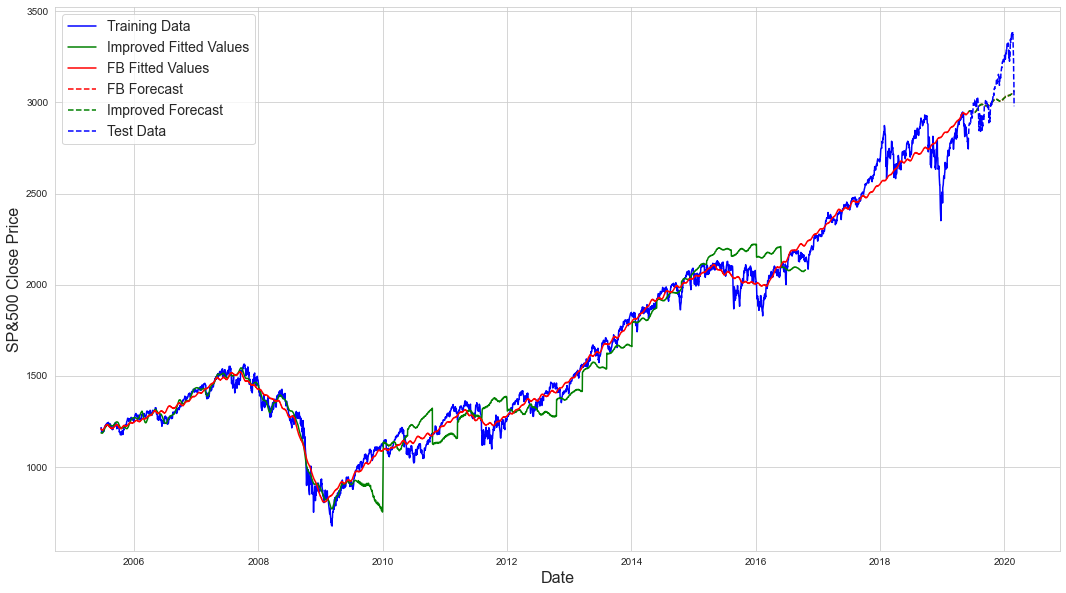

In [169]:
plt.figure(figsize=(18,10))

# plot the training data
plt.plot(df_train.ds,df_train.y,'b', label = "Training Data")

plt.plot(df_train.ds,df_train.fbsp,'g-', label = "Improved Fitted Values")

# plot the fit
plt.plot(df_train.ds, fc_df[:cutoff].fbsp,'r-', label = "FB Fitted Values")

# plot the forecast
plt.plot(df_test.ds, fc_df[cutoff:].fbsp,'r--', label = "FB Forecast")
plt.plot(df_test.ds,  df_test.fbsp,'g--',label = "Improved Forecast")
plt.plot(df_test.ds, df_test.y,'b--', label = "Test Data")

plt.legend(fontsize=14)

plt.xlabel("Date", fontsize=16)
plt.ylabel("SP&500 Close Price", fontsize=16)

plt.show()

,ds,y,tby,ffr,fta,eps,div,per,une,rus,wti,ppi,rfs,vix,fbsp,fbspwithcovid


In [95]:
import datetime as datetime
covid_start_date = datetime.datetime(2019, 12, 31)
dates = df[['ds']]
coviddates=dates.loc[dates.ds > covid_start_date , ].copy()
coviddates.dtypes

ds    datetime64[ns]
dtype: object

In [40]:
pd.concat([df_train,df_test])

,ds,y,tby,ffr,fta,eps,div,per,une,rus,wti,ppi,rfs,vix,fbsp
0,2005-06-20,1216.10,4.11,3.04,812235.0,84.81,1.76,18.8026,5.0,641.840027,59.19,154.3,343998.0,148.30,1189.216737
1,2005-06-21,1213.61,4.06,3.04,812235.0,84.81,1.76,18.8026,5.0,641.039978,58.90,154.3,343998.0,149.00,1189.693256
2,2005-06-22,1213.88,3.95,3.04,811179.0,84.81,1.76,18.8026,5.0,643.450012,58.27,154.3,343998.0,148.40,1188.916551
3,2005-06-23,1200.73,3.96,3.04,811179.0,84.81,1.76,18.8026,5.0,634.119995,59.23,154.3,343998.0,150.50,1187.930377
4,2005-06-24,1191.57,3.92,3.04,811179.0,84.81,1.76,18.8026,5.0,630.409973,59.63,154.3,343998.0,152.00,1188.500994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662,2020-02-21,3337.75,1.46,1.58,4171570.0,135.28,1.79,25.3952,3.5,1678.609985,53.36,196.7,525810.0,17.05,3177.131082
3663,2020-02-24,3225.89,1.38,1.58,4171570.0,135.28,1.79,25.3952,3.5,1628.099976,51.36,196.7,525810.0,20.15,3178.702972
3664,2020-02-25,3128.21,1.33,1.58,4171570.0,135.28,1.79,25.3952,3.5,1571.900024,49.78,196.7,525810.0,21.95,3180.693161
3665,2020-02-26,3116.39,1.33,1.58,4158637.0,135.28,1.79,25.3952,3.5,1552.760010,48.67,196.7,525810.0,22.45,3182.067185


In [116]:
##covid without loop

covid = pd.DataFrame({
  'holiday': 'covid',
  'ds': np.array(coviddates.ds.values),
    'lower_window': 0,
  'upper_window': 1,
})


In [152]:
from fbprophet import Prophet
pred_periods = int((1-p)* len(df))
fbpcovid = Prophet(growth='linear',holidays=covid, seasonality_mode='additive',changepoint_prior_scale = 50, daily_seasonality=False).add_seasonality(name = 'daily', period=1, fourier_order=50)

# fit close price using fbprophet model
fbpcovid.fit(df_train[['ds','y']])
    
 # predict pred_size futures and get the forecast price 
futcovid = fbpcovid.make_future_dataframe(periods = pred_periods)
forecastcovid = fbpcovid.predict(fut) 


C:\Users\Malavika\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [118]:
print(forecastcovid)
len(forecastcovid.index)

             ds        trend   yhat_lower   yhat_upper  trend_lower  \
0    2005-06-20  1211.786850  1148.104149  1261.457285  1211.786850   
1    2005-06-21  1211.979836  1145.664525  1262.208638  1211.979836   
2    2005-06-22  1212.172823  1148.430685  1260.324887  1212.172823   
3    2005-06-23  1212.365809  1144.149711  1260.884381  1212.365809   
4    2005-06-24  1212.558795  1145.647067  1260.439358  1212.558795   
...         ...          ...          ...          ...          ...   
3662 2019-09-03  3189.382925  2890.503298  3482.099141  2902.051203   
3663 2019-09-04  3190.317409  2886.028634  3489.192894  2901.556307   
3664 2019-09-05  3191.251894  2890.142193  3488.750902  2901.326419   
3665 2019-09-06  3192.186378  2894.239293  3484.252950  2900.886033   
3666 2019-09-07  3193.120862  2892.772577  3490.940791  2900.635001   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0     1211.786850       -7.260334             -7.260334           

3667

In [153]:
df_test['fbspwithcovid'] = forecastcovid.loc[cutoff:, 'yhat']
df_test

,ds,y,tby,ffr,fta,eps,div,per,une,rus,wti,ppi,rfs,vix,fbsp,fbspwithcovid
3301,2018-09-07,2871.68,2.94,1.95,4208496.0,134.20,1.82,22.3482,3.7,1713.180054,67.73,203.6,500362.0,15.45,2842.653450,2851.038778
3302,2018-09-10,2877.13,2.94,1.95,4208496.0,134.20,1.82,22.3482,3.7,1717.469971,67.55,203.6,500362.0,14.75,2843.539845,2852.455486
3303,2018-09-11,2887.89,2.98,1.95,4208496.0,134.20,1.82,22.3482,3.7,1718.400024,69.29,203.6,500362.0,14.20,2845.217862,2854.251456
3304,2018-09-12,2888.92,2.97,1.95,4210812.0,134.20,1.82,22.3482,3.7,1715.699951,70.37,203.6,500362.0,14.05,2846.592091,2855.159320
3305,2018-09-13,2904.18,2.97,1.95,4210812.0,134.20,1.82,22.3482,3.7,1714.319946,68.60,203.6,500362.0,13.42,2849.163300,2857.763502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662,2020-02-21,3337.75,1.46,1.58,4171570.0,135.28,1.79,25.3952,3.5,1678.609985,53.36,196.7,525810.0,17.05,3177.131082,3189.329081
3663,2020-02-24,3225.89,1.38,1.58,4171570.0,135.28,1.79,25.3952,3.5,1628.099976,51.36,196.7,525810.0,20.15,3178.702972,3191.262127
3664,2020-02-25,3128.21,1.33,1.58,4171570.0,135.28,1.79,25.3952,3.5,1571.900024,49.78,196.7,525810.0,21.95,3180.693161,3193.287050
3665,2020-02-26,3116.39,1.33,1.58,4158637.0,135.28,1.79,25.3952,3.5,1552.760010,48.67,196.7,525810.0,22.45,3182.067185,3194.883557


In [154]:
fcwithcovid_df = pd.DataFrame(data={'ds': df[:len(forecastcovid)].ds.to_numpy().ravel(), 'fbsp': forecast.yhat,'fbspwithcovid':forecastcovid.yhat})
fcwithcovid_df

,ds,fbsp,fbspwithcovid
0,2005-06-20,1204.627187,1198.191182
1,2005-06-21,1204.347155,1197.995905
2,2005-06-22,1203.227625,1197.281378
3,2005-06-23,1202.595271,1196.726876
4,2005-06-24,1201.450481,1195.846684
...,...,...,...
3662,2020-02-21,3177.131082,3189.329081
3663,2020-02-24,3178.702972,3191.262127
3664,2020-02-25,3180.693161,3193.287050
3665,2020-02-26,3182.067185,3194.883557


In [104]:
len(fcwithcovid_df[:cutoff])

3301

In [106]:
len(df_train.ds)
df_train

,ds,y,tby,ffr,fta,eps,div,per,une,rus,wti,ppi,rfs,vix,fbsp
0,2005-06-20,1216.10,4.11,3.04,812235.0,84.81,1.76,18.8026,5.0,641.840027,59.19,154.3,343998.0,148.30,1189.216737
1,2005-06-21,1213.61,4.06,3.04,812235.0,84.81,1.76,18.8026,5.0,641.039978,58.90,154.3,343998.0,149.00,1189.693256
2,2005-06-22,1213.88,3.95,3.04,811179.0,84.81,1.76,18.8026,5.0,643.450012,58.27,154.3,343998.0,148.40,1188.916551
3,2005-06-23,1200.73,3.96,3.04,811179.0,84.81,1.76,18.8026,5.0,634.119995,59.23,154.3,343998.0,150.50,1187.930377
4,2005-06-24,1191.57,3.92,3.04,811179.0,84.81,1.76,18.8026,5.0,630.409973,59.63,154.3,343998.0,152.00,1188.500994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3296,2018-08-30,2901.13,2.86,1.91,4218914.0,131.51,1.84,22.2526,3.8,1732.349976,70.25,203.4,501913.0,14.55,2779.304193
3297,2018-08-31,2901.52,2.86,1.91,4218914.0,134.20,1.82,22.2526,3.8,1740.750000,69.84,203.4,501913.0,13.98,2781.035650
3298,2018-09-04,2896.72,2.90,1.95,4218914.0,134.20,1.82,22.3482,3.7,1733.380005,69.82,203.6,500362.0,14.25,2783.330732
3299,2018-09-05,2888.60,2.90,1.95,4208496.0,134.20,1.82,22.3482,3.7,1727.650024,68.69,203.6,500362.0,14.60,2784.933109


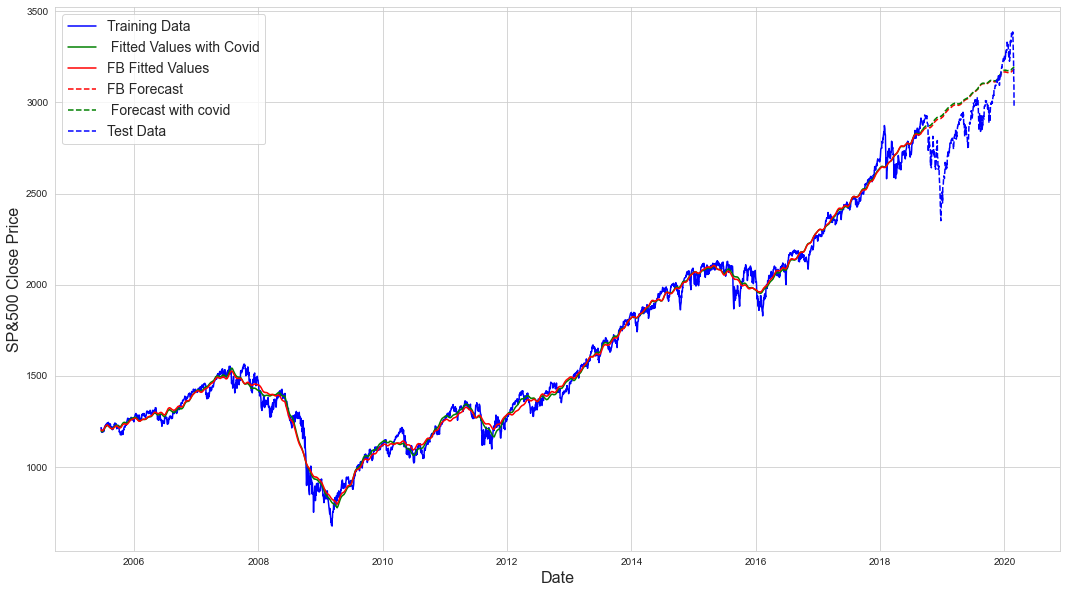

In [155]:
plt.figure(figsize=(18,10))

# plot the training data
plt.plot(df_train.ds,df_train.y,'b', label = "Training Data")

plt.plot(df_train.ds,fcwithcovid_df[:cutoff].fbspwithcovid,'g-', label = " Fitted Values with Covid")

# plot the fit
plt.plot(df_train.ds, fcwithcovid_df[:cutoff].fbsp,'r-', label = "FB Fitted Values")

# plot the forecast
plt.plot(df_test.ds, fcwithcovid_df[cutoff:].fbsp,'r--', label = "FB Forecast")
plt.plot(df_test.ds,  df_test.fbspwithcovid,'g--',label = " Forecast with covid")
plt.plot(df_test.ds, df_test.y,'b--', label = "Test Data")

plt.legend(fontsize=14)

plt.xlabel("Date", fontsize=16)
plt.ylabel("SP&500 Close Price", fontsize=16)

plt.show()

In [42]:
df2 = df.copy()
# df2['fbsp1'] = fc_df.fbsp
# df2['diff1'] =  df2['y'] - df2['fbsp1']
df2['fbsp'] = pd.concat([df_train,df_test]).fbsp
df2['diff'] = df2['y'] - df2['fbsp']


In [43]:
df2 = df2.dropna()
df2['ds'] = pd.to_datetime(df2['ds'])
df2 = df2.set_index(df2['ds'])
df2 = df2.drop(columns=['ds'])

In [44]:
df3 = df2.loc[df2.index[start]:,].copy()
df3

,y,tby,ffr,fta,eps,div,per,une,rus,wti,ppi,rfs,vix,fbsp,diff
ds,,,,,,,,,,,,,,,
2009-01-28,874.09,2.71,0.15,1927437.0,18.75,3.23,120.3907,7.8,473.019989,42.04,171.2,336929.0,42.35,773.917780,100.172220
2009-01-29,845.14,2.87,0.15,1927437.0,18.75,3.23,120.3907,7.8,453.239990,41.58,171.2,336929.0,43.33,770.273070,74.866930
2009-01-30,825.88,2.87,0.15,1927437.0,18.75,3.23,120.3907,7.8,443.529999,41.73,171.2,336929.0,44.96,768.317922,57.562078
2009-02-02,825.44,2.76,0.22,1927437.0,15.31,3.24,107.1560,8.3,449.609985,41.35,169.3,335576.0,45.40,773.621482,51.818518
2009-02-03,838.51,2.89,0.22,1927437.0,15.31,3.24,107.1560,8.3,452.899994,40.87,169.3,335576.0,43.05,771.585138,66.924862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-21,3337.75,1.46,1.58,4171570.0,135.28,1.79,25.3952,3.5,1678.609985,53.36,196.7,525810.0,17.05,3177.131082,160.618918
2020-02-24,3225.89,1.38,1.58,4171570.0,135.28,1.79,25.3952,3.5,1628.099976,51.36,196.7,525810.0,20.15,3178.702972,47.187028
2020-02-25,3128.21,1.33,1.58,4171570.0,135.28,1.79,25.3952,3.5,1571.900024,49.78,196.7,525810.0,21.95,3180.693161,-52.483161


In [45]:
df3.to_csv(r'dff1.csv')

In [48]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))
playoffs
holidays

,holiday,ds,lower_window,upper_window
0,playoff,2008-01-13,0,1
1,playoff,2009-01-03,0,1
2,playoff,2010-01-16,0,1
3,playoff,2010-01-24,0,1
4,playoff,2010-02-07,0,1
5,playoff,2011-01-08,0,1
6,playoff,2013-01-12,0,1
7,playoff,2014-01-12,0,1
8,playoff,2014-01-19,0,1
9,playoff,2014-02-02,0,1
